In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

# a) Create and train simple regression model of sqft_living to price.  


First, we train a linear regression model on the data `sqft_living`, `price`.  
This step just prepares the model and splits the data into training and testing sets.


In [36]:
#a)

x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

model = LinearRegression()
model.fit(X_train, y_train)

#Your code:


#Hint: .fit()

LinearRegression()

# b) Evaluate and visualise created model.  



We evaluate the trained linear regression model by calculating the **mean squared error (MSE)**, which measures how well the model predicts the actual house prices.  
We also visualise the model by plotting the **regression line** (predicted prices) in red and the **actual data points** as a scatter plot.  

> Note: This is a very simple example using only one feature (`sqft_living`) to predict price, so the error is quite high. In practice, using multiple features would give more accurate predictions.








Mean squared error: 57975278545.99522


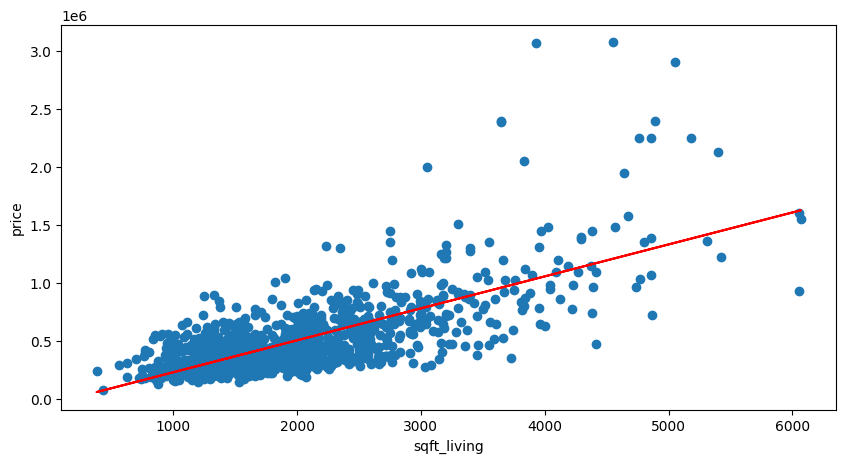

In [37]:
#b)

#Your code:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.plot(x, (x * model.coef_ + model.intercept_),"r")
plt.scatter(x,y)
print('Mean squared error:',mean_squared_error(y, (x*model.coef_+model.intercept_)))

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

# c) Create and plot higher order polynomial regression models.

## Steps

1. **Polynomial Feature Transformation**
   - Use `PolynomialFeatures` from `sklearn.preprocessing` to create polynomial terms for the input data `x`.
   - Example: for order = 3, input `[x]` becomes `[x, x^2, x^3]`.

2. **Model Fitting**
   - Use `LinearRegression` from `sklearn.linear_model`.
   - Fit the model on the polynomial-transformed features and target values `y`.
   - This step estimates the coefficients (w0, w1, …, wn) for the polynomial function.

3. **Prediction**
   - Use `model.predict()` to generate predicted values `y_pred` for each polynomial model.
   
4. **Visualization**
   - Plot the original data points (`x`, `y`) as a scatter plot.
   - Plot the predicted polynomial curve as a line.
   - Arrange plots in a 4×2 grid to compare polynomial degrees from 1 to 8.

5. **Error Calculation**
   - Compute the Mean Squared Error (MSE) between `y` and `y_pred` for each polynomial order.
   - Use this to evaluate which polynomial degree fits the data best without overfitting.





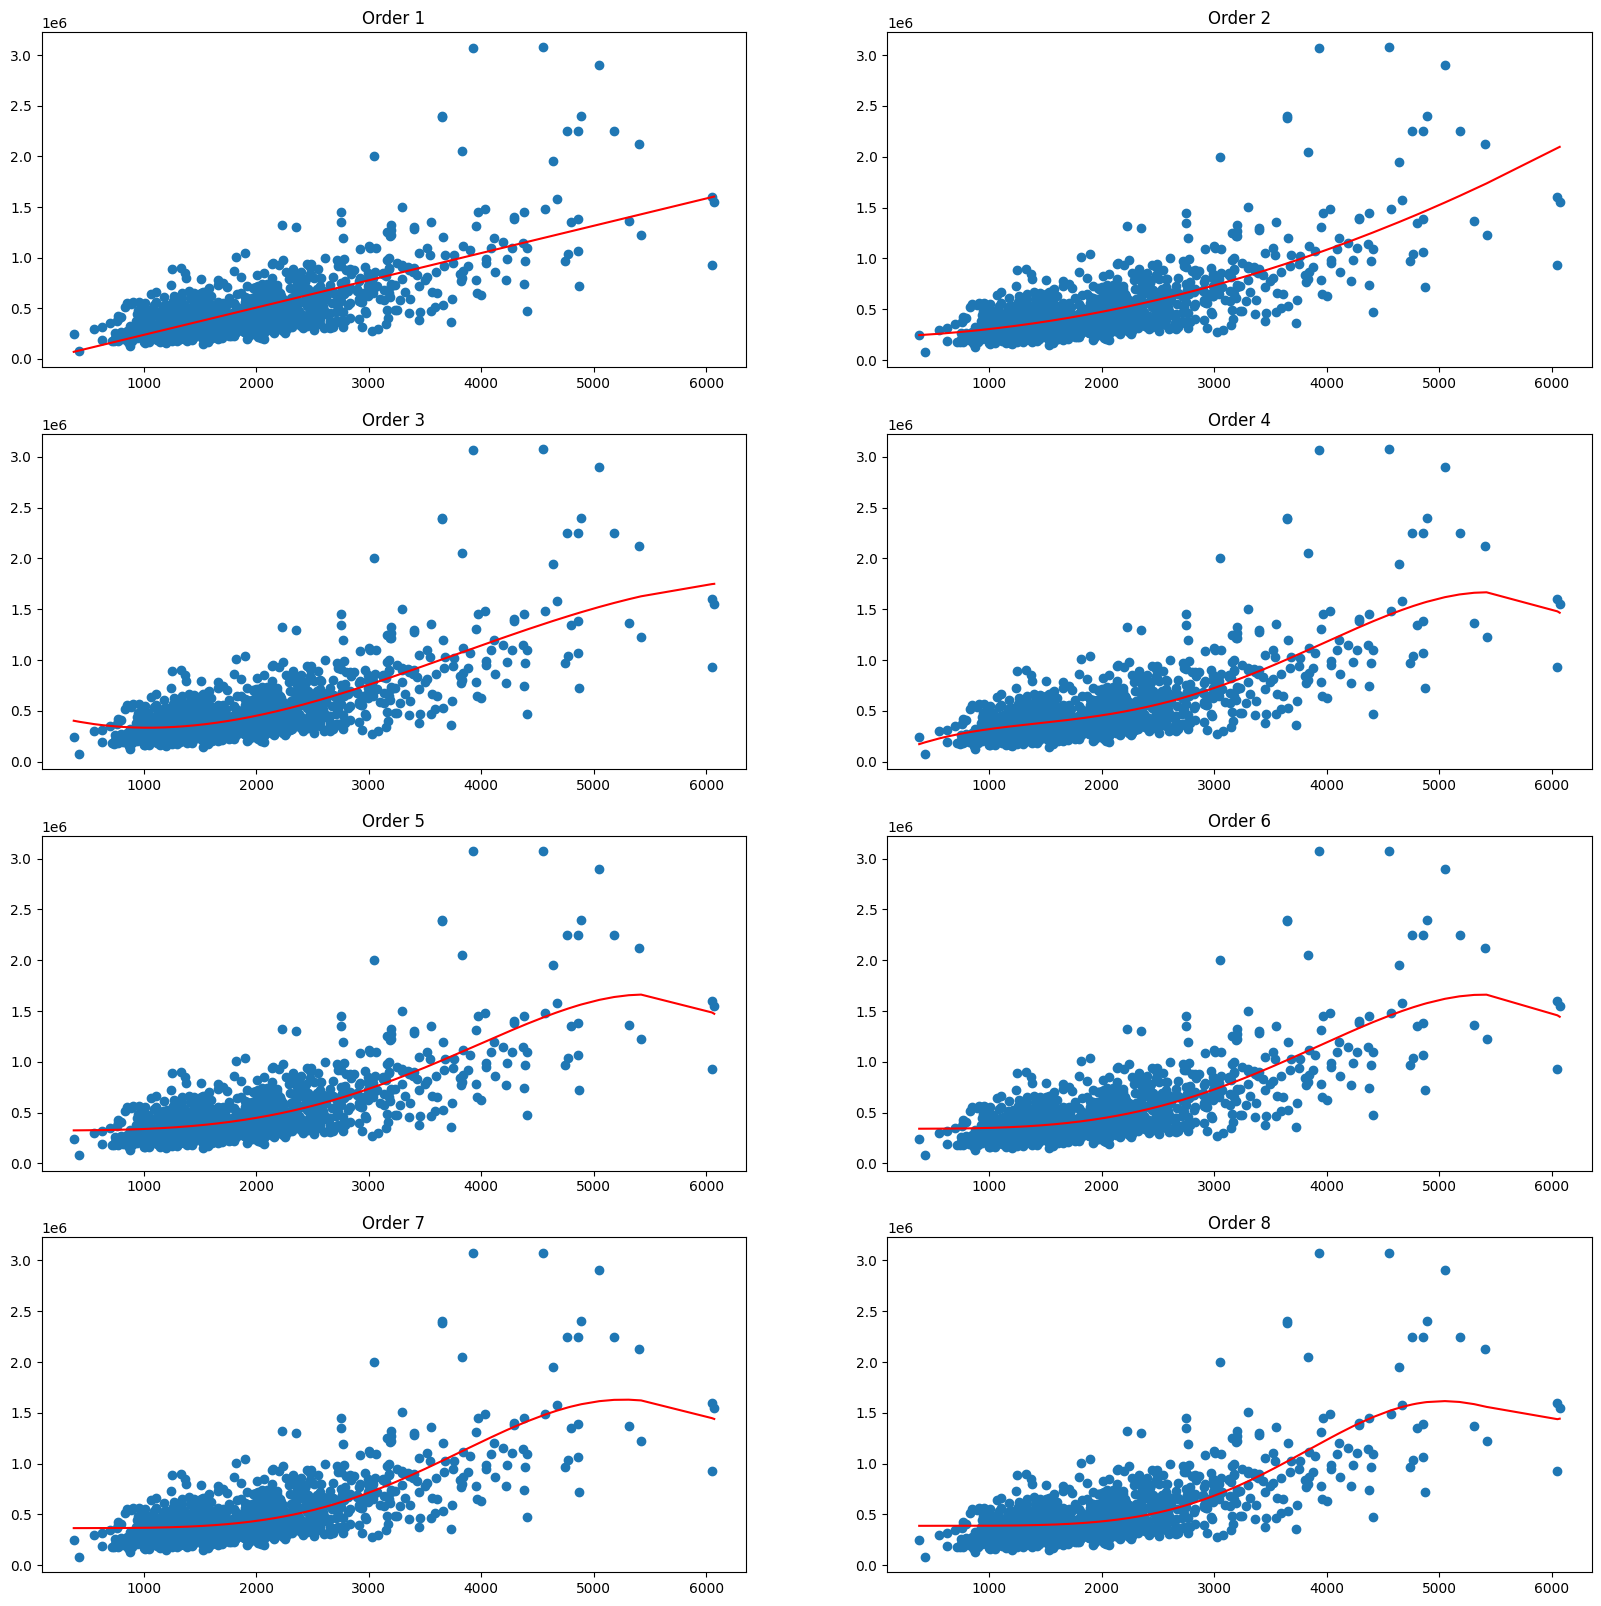

In [38]:
#c)
mean = []

fig, axs = plt.subplots(4, 2, figsize=(20, 20))

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False) # possible functions
    X_order = poly.fit_transform(x) # fitting data to the functions
    model.fit (X_order,y)  # learning the coefficients (w0, w1, ...) of the polynomial
    y_pred = model.predict(X_order) # predicting

    l = []

    #adding elements to the function
    for X_val in x:
        l.append(X_val[0])

    u = []

    for Y_val in y_pred:
        u.append(Y_val)

    Z = [i for _, i in sorted (zip (l,u))] # sorting elements
    l.sort()

    row = (order - 1) // 2
    col = (order - 1) % 2

    axs[row, col].scatter (x,y)
    axs[row, col].plot (l,Z, color="red")
    axs[row, col].set_title(f'Order {order}')
    mean.append (mean_squared_error(y, y_pred))


# Observation

As we can see, increasing the polynomial degree initially improves the fit.  
However, there is a limit - the **best fit is achieved with the 4th-degree polynomial**.  
Higher degrees start to overfit the data, resulting in worse generalization.


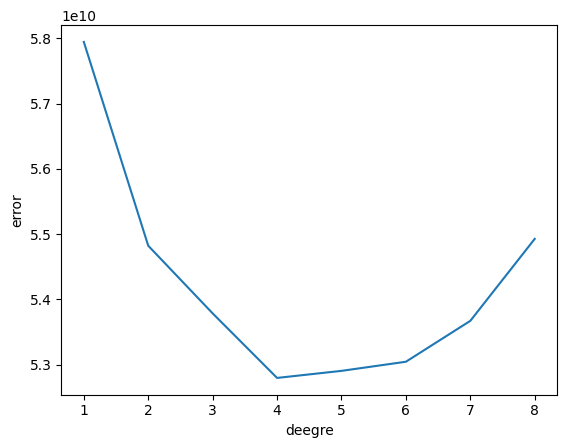

In [39]:
degree = list(range(1, 9))
fig.set_figwidth (22)
fig.set_figheight (11)
plt.xlabel ("deegre")
plt.ylabel ("error")
plt.plot (degree,mean)


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

## Observation: Training vs Test Data

In this exercise, we trained polynomial regression models of degrees 1 through 8 on a subset of the data (training set) and evaluated their performance on both the **training** and **test** sets.

### Key Points:

- The **training data** consistently shows lower Mean Squared Error (MSE) compared to the **test data**.  
  - This is because the model has **already seen these points** during training and optimizes its coefficients to fit them as closely as possible.

- The **test data**, which the model has **not seen during training**, typically has higher MSE.  
  - This indicates how well the model generalizes to **new, unseen data**.  

- As the polynomial degree increases:
  - MSE on the training data continues to decrease, showing better fit.
  - MSE on the test data may start increasing for very high-degree polynomials, indicating **overfitting**.  

### Conclusion:

- The difference between training and test MSE highlights the trade-off between **fit and generalization**.  
- A model that fits training data perfectly is **not necessarily the best model** for predicting new data.


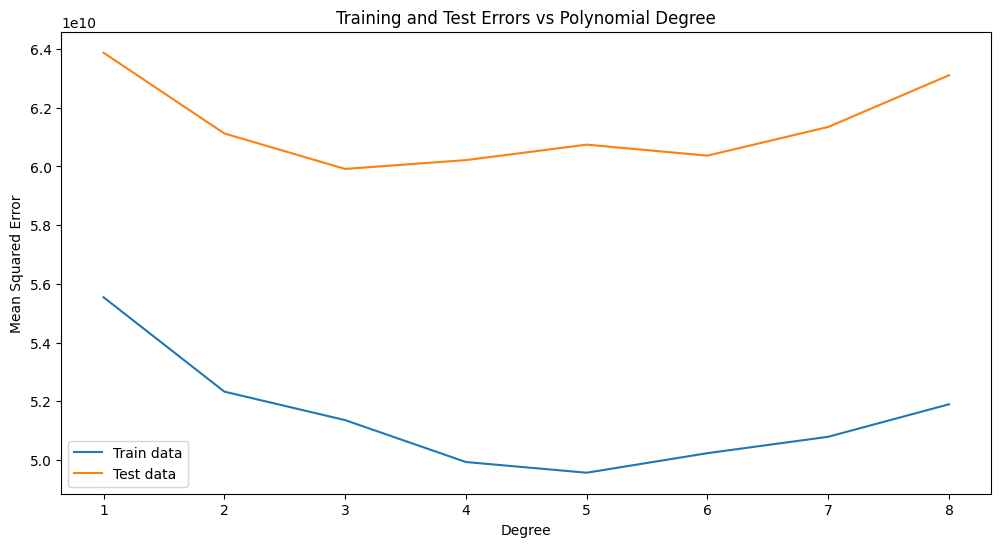

In [40]:
#a)
mean_train = []
mean_test = []

degree = list(range(1, 9))

for order in degree:
    poly = PolynomialFeatures (order, include_bias = False)
    X_order = poly.fit_transform (x)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    model2 = LinearRegression ()
    model2.fit (X_test,y_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mean_train.append(mean_squared_error(y_train, y_train_pred))
    mean_test.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(12,6))
plt.plot(degree, mean_train, label="Train data")
plt.plot(degree, mean_test, label="Test data")
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Errors vs Polynomial Degree")
plt.legend()
plt.show()



## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

# a) Train model to predict sqft_living for a given house price. Plot predictions.  


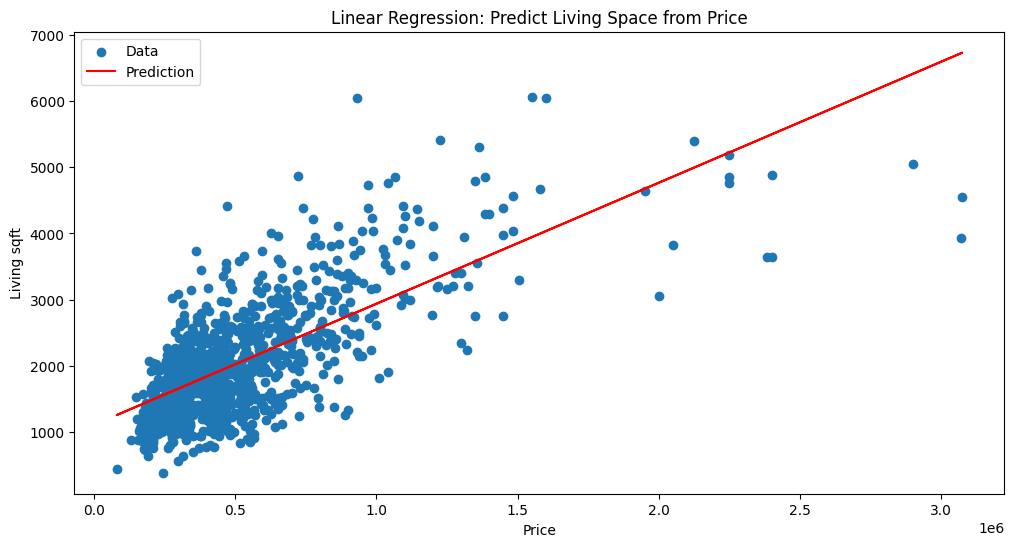

Mean squared error equals: 1671216.952007866


In [53]:
X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plt.scatter(X, y, label="Data")

plt.plot(X, X * model.coef_ + model.intercept_, color="red", label="Prediction")
plt.xlabel("Price")
plt.ylabel("Living sqft")
plt.title("Linear Regression: Predict Living Space from Price")
plt.legend()
plt.show()

error = mean_squared_error(y, (x*model.coef_+model.intercept_))
print('Mean squared error equals:', error)



# b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.





In [57]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 54053591747.298004


# Model 1
The **only difference** compared to another version of this model is:  
- **Random state**: 40 → determines which rows are selected for training and testing.  


In [66]:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 46740602716.88065


## Features Used
- `sqft_living` – living area  
- `sqft_lot` – lot size  
- `grade` – construction grade  
- `view` – quality of view  
- Additional features: `bedrooms`, `bathrooms`, `floors`, `waterfront`, `condition`, `yr_built`, `yr_renovated`



In [71]:
features = ['sqft_living', 'sqft_lot', 'grade', 'view',
            'bedrooms', 'bathrooms', 'floors', 'waterfront',
            'condition', 'yr_built', 'yr_renovated']

X = house_df[features].values
y = house_df['price'].values.reshape(-1)

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error equals:", mse)

Mean squared error equals: 41224252821.70343
